In [1]:
import os
mpl_config_dir = './conda/.config/matplotlib'
os.environ['MPLCONFIGDIR'] = mpl_config_dir
print("MPLCONFIGDIR is set to:", os.environ['MPLCONFIGDIR'])
import matplotlib.pyplot as plt


MPLCONFIGDIR is set to: ./conda/.config/matplotlib


In [2]:
from model import NNmodel as nModel

from model import NNmodel as nModel
from torch.utils.data import DataLoader
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim

from torch.utils.tensorboard import SummaryWriter
from datetime import datetime
import data_loader.data_loader as dB

from torch.utils.data import Dataset, DataLoader, SubsetRandomSampler
import numpy as np


     

Data variables:
    mslp     (time, latitude, longitude) float32 25MB 1.007e+05 ... 1.021e+05
    tp       (time, latitude, longitude) float32 25MB 2.71e-06 ... 2.193e-06
    t2m      (time, latitude, longitude) float32 25MB 220.2 220.2 ... 273.7
    v200     (time, latitude, longitude) float32 25MB -0.0007797 ... -9.726e-05
    v850     (time, latitude, longitude) float32 25MB 0.0003245 ... 8.932e-05
    u200     (time, latitude, longitude) float32 25MB -0.0005746 ... -0.0002563
    u850     (time, latitude, longitude) float32 25MB 7.048e-05 ... -0.0001564


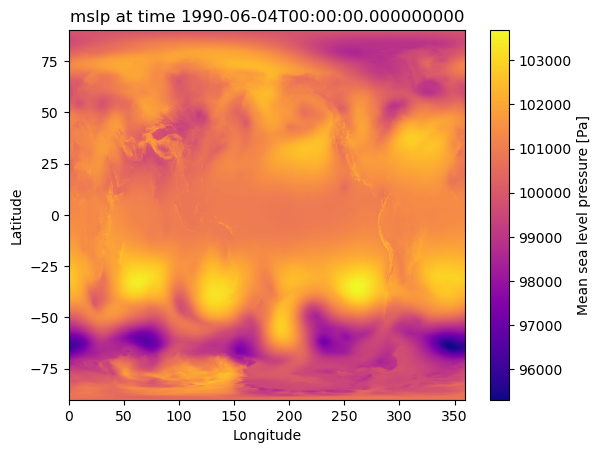

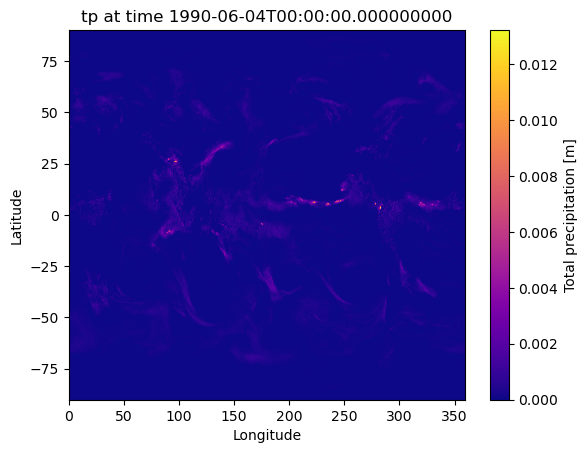

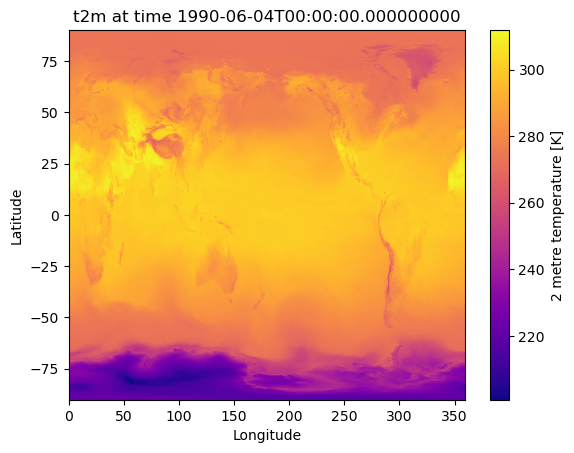

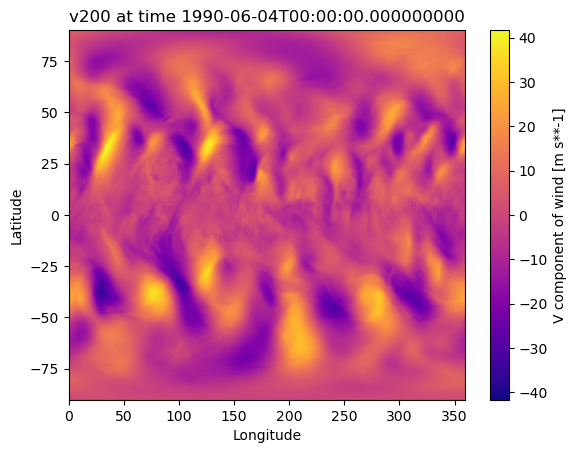

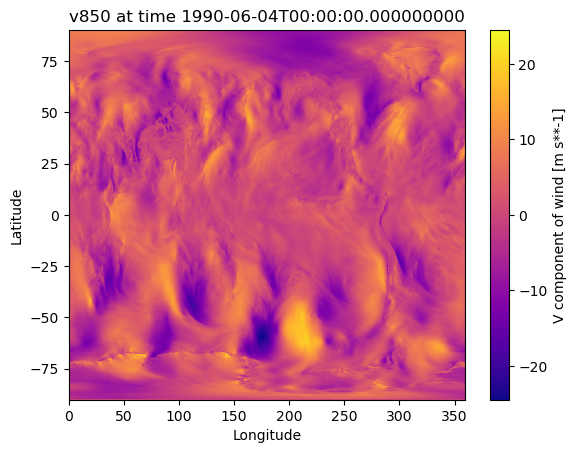

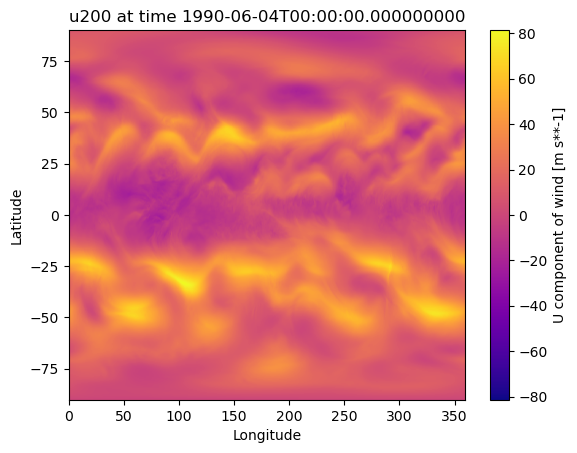

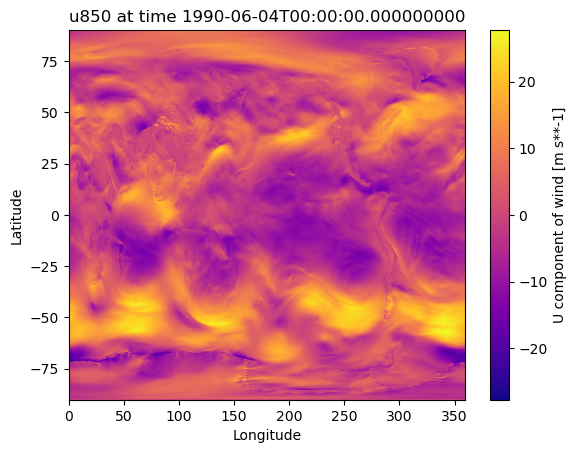

In [5]:
train_years = range(2000, 2021)
val_years = range(1993, 2000)
offsets = range(31,41)
train_data = dB.NetCDFDataset('/Net/elnino/data/obs/ERA5/global/daily/',)


train_data[1990,10]
train_data.merged_ds

print(train_data.merged_ds.data_vars)
for var in train_data.merged_ds.data_vars:
    train_data.merged_ds[var].isel(time=0).plot(x='longitude', y='latitude', cmap='plasma')
    plt.title(f"{var} at time {train_data.merged_ds.time[0].values}")
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    # plt.colorbar(label=train_data.merged_ds[var].units)
    plt.show()
# train_data.visualize(variables=['sst', 't2m'], years=(1990,31))


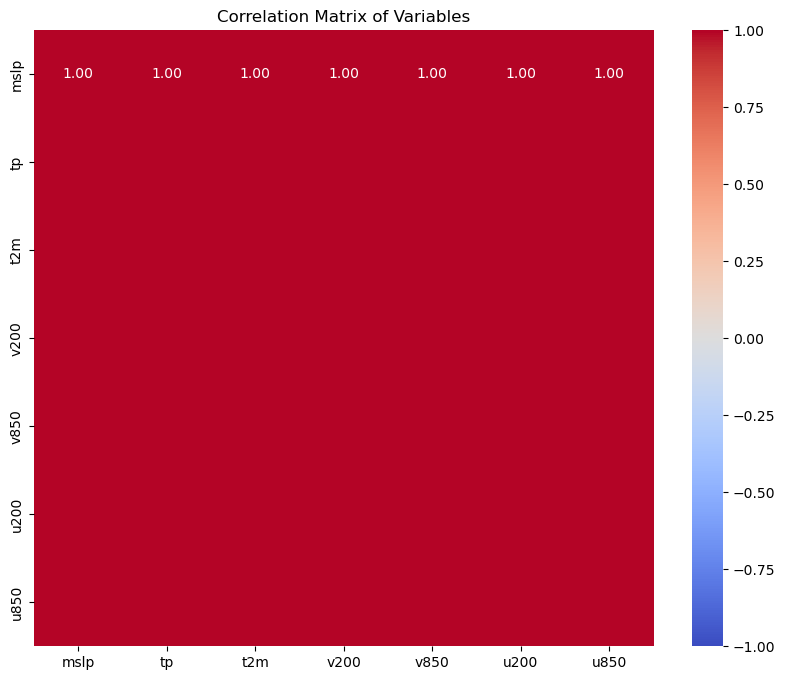

In [12]:
import seaborn as sns
import pandas as pd

# Assuming train_data is your NetCDFDataset object

# Extract the variables data
variables_data = train_data.merged_ds.to_array().values

# Reshape the array to a 2-dimensional shape
variables_data_2d = variables_data.reshape(-1, variables_data.shape[0])

# Convert the data to a pandas DataFrame
variables_df = pd.DataFrame(variables_data_2d, columns=train_data.merged_ds.data_vars)

# Calculate the correlation matrix
correlation_matrix = variables_df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix of Variables')
plt.show()


In [21]:
first_variable = False
for var1 in train_data.merged_ds.data_vars:
    for var2 in train_data.merged_ds.data_vars:
        # Skip if the same variable or if var1 is not the first variable
        if var1 == var2 or not first_variable:
                continue
            
        first_variable = False 
        print(var1,var2)
        # Extract the data for the two variables
        variable1_data = train_data.merged_ds[var1].values.flatten()
        variable2_data = train_data.merged_ds[var2].values.flatten()
        
        # Calculate the correlation coefficient between the two variables
        correlation_coefficient = np.corrcoef(variable1_data, variable2_data)[0, 1]

        # Plot the data
        plt.scatter(variable1_data, variable2_data, alpha=0.5)
        plt.title(f'Correlation between {var1} and {var2} (Correlation Coefficient: {correlation_coefficient:.2f})')
        plt.xlabel(var1)
        plt.ylabel(var2)
        plt.grid(True)
        plt.show()